# Text: Cleaning & EDA

### Imports

In [136]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import path
from wordcloud import WordCloud

import string
import re
from nltk.corpus import stopwords
from nltk.tokenize.regexp import regexp_tokenize
from nltk import FreqDist

In [41]:
#load data
emails = pd.read_csv('email_df.csv', index_col=0)

In [50]:
emails.head(2)

,text,tokens,target
0,Welcome to the team!. Thanks for joining the t...,"['Welcome', 'team', '!.', 'Thanks', 'joining',...",Liberal
1,Quickly closing in. We’re just 5 days away fro...,"['Quickly', 'closing', '.', 'We', '’re', '5', ...",Liberal


# Data Cleaning & Preprocessing 1
Steps: 
1. Remove punctuation and special characters
2. Use `regex_tokenizer` to tokenize by word
3. Remove stopwords from tokens
4. Rejoin as string for future vectorizing steps

This process was chosen for its faster copuational speed. Other tokenizers exist that do not tokenize based on whitespace. Given future pre-processing steps, these toeknizers would not be benificial to the problem. For exmaple, with other tokenizers "can't" is split as [ca, n't]. Given that I will be removing 'can', as it is a stopword, the additional processing time wasn't worth it. 

In [15]:
#generate stopwords
stop_words = stopwords.words('english')

#translate table for faster pre-processing
t = str.maketrans('  ','  ', '!"#$%&–\'.()*+,-/:;<=>?@[\]^_`{|}~')

In [4]:
#use translate to remove puncuation
emails['clean'] = emails['text'].apply(lambda x: str(x).lower().replace("\n", " ").translate(t))

#use regex_tokenizer to tokenize then remove stopwords
emails['clean'] = emails['clean'].apply(lambda x: ' '.join([word for word in regexp_tokenize(x, pattern='\w+') \
                                                            if word not in stop_words]))

# Data Cleaning & Preprocessing 2
Applying different preprocessing steps. 
1. Remove all non-word characters, such as punctuation and numbers
2. Tokenize by whitespace, creating a 'tokens' column
3. Remove stopwords and stray single letters from tokens
4. Rejoin words as string for future vectorizing steps

I'm attempting a different method to see the impacts of removing numbers. In some EDA steps I noticed previous pre-processing steps unintentionally joined words together. Especially when next to punctuation. For example "truth,summer" became "truthsummer". Additionally, there were quite a few numbers within the previous vocabulary. This increased the overall vocabulary and complexity. The steps above aim to combat against that. 

In [51]:
#loading saved emails_df to not have to wait for above pre-processing again
emails = pd.read_csv('emails_clean.csv', index_col=0)

In [57]:
#sample text before: 
emails['text'].iloc[4]

"We need to close the gap fast. Here’s the truth,summer is the most difficult fundraising season for any campaign, even though it’s\nKathleen Williams for Congress\nPlease be safe and follow CDC guidance during the coronavirus outbreak. As our country works through this difficult time, please join me in reaching out to those in need or who are feeling isolated - we are all in this together.\nHere’s the truth, summer is the most difficult fundraising season for any campaign -- even though it’s our most critical.\nAnd with July quickly coming to an end, we need to close the $15,289 gap that still stands between us and our end-of-month fundraising drive. Will you chip in $15 to help us catch up to where we should be today?\nIf you've saved your payment information with ActBlue Express, your donation will go through immediately:\n$10 $25 $50\n$100 $250 Other\nUnless we get a second wind of support, there’s no path that will get us to our goal before July ends. That means we’ll have to make

In [60]:
#generate stopwords
stop_words = stopwords.words('english') + list(string.ascii_lowercase)

In [61]:
#use regex to remove all non-word characters
emails['clean2'] = emails['text'].apply(lambda x: re.sub(r'([\W\d_])+', ' ', str(x).lower()))

#create tokens and remove stopwords
emails['tokens'] = emails['clean2'].apply(lambda x: [word for word in x.split() if word not in stop_words])

#join tokens together for vectors
emails['clean2'] = emails['tokens'].apply(lambda x: ' '.join(x))

In [62]:
#sample text after
emails['clean2'].iloc[4]

'need close gap fast truth summer difficult fundraising season campaign even though kathleen williams congress please safe follow cdc guidance coronavirus outbreak country works difficult time please join reaching need feeling isolated together truth summer difficult fundraising season campaign even though critical july quickly coming end need close gap still stands us end month fundraising drive chip help us catch today saved payment information actblue express donation go immediately unless get second wind support path get us goal july ends means make serious budget cuts affect online ads radio airtime even staffing would mean losing key resources get kathleen elected still time friday midnight deadline rush contribution amount help us fund program throughout summer thank jeff allen campaign manager kathleen williams congress kathleen williams fighter montana running congress fix broken health care system foster opportunity montanans protect montana outdoor heritage contribute monthl

# Length of Emails
I will explore the lengths of the email by target. Do different parties send longer/shorter emails than other parties? 

In [67]:
#length before processing
emails['text_length'] = emails['text'].apply(lambda x: len(str(x)))

#length after processing
emails['clean_length'] = emails['clean2'].apply(lambda x: len(str(x)))

target        Center  Conservative        Liberal
count    2010.000000  66815.000000  247676.000000
mean     2355.992537   2255.842655    2443.952535
std      1916.307579   1354.516416    1461.334049
min        57.000000      3.000000       3.000000
25%      1252.250000   1513.000000    1725.000000
50%      1984.000000   2019.000000    2333.000000
75%      2810.000000   2652.000000    2949.000000
max     23519.000000  45723.000000   51759.000000


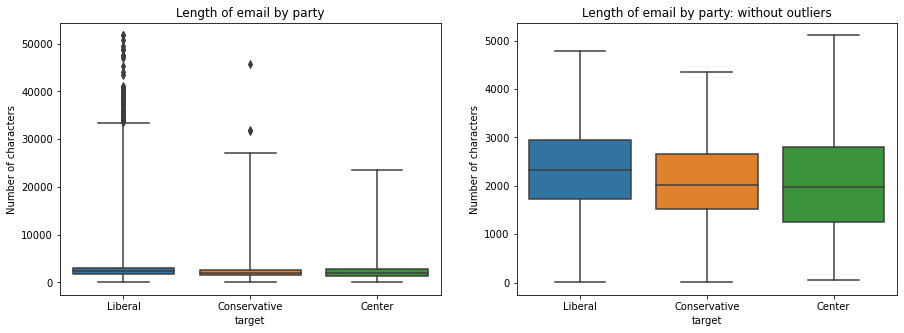

In [130]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=emails[['target', 'text_length']],
            x='target',
            y='text_length',
            whis=25, 
            ax=ax[0]).set(title = 'Length of email by party', ylabel='Number of characters');

sns.boxplot(data=emails[['target', 'text_length']],
            x='target',
            y='text_length',
            showfliers=False, 
            ax=ax[1]).set(title = 'Length of email by party: without outliers', ylabel='Number of characters');

print(emails.groupby('target')['text_length'].describe().T)

target        Center  Conservative        Liberal
count    2010.000000  66815.000000  247676.000000
mean     1611.733333   1505.192232    1619.261382
std      1374.546686    930.707462    1034.572535
min        41.000000      3.000000       3.000000
25%       835.500000    997.000000    1125.000000
50%      1318.000000   1346.000000    1538.000000
75%      1898.250000   1775.000000    1952.000000
max     16125.000000  32980.000000   38291.000000


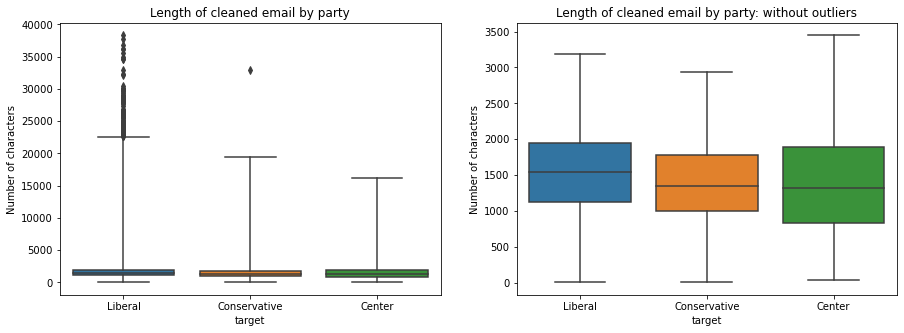

In [134]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=emails[['target', 'clean_length']],
            x='target',
            y='clean_length',
            whis=25, 
            ax=ax[0]).set(title = 'Length of cleaned email by party', ylabel='Number of characters');

sns.boxplot(data=emails[['target', 'clean_length']],
            x='target',
            y='clean_length',
            showfliers=False, 
            ax=ax[1]).set(title = 'Length of cleaned email by party: without outliers', ylabel='Number of characters');

print(emails.groupby('target')['clean_length'].describe().T)

On average conservative emails are shorter than Liberal and Center/Nonpartisan emails. Liberal emails tend to be longer and contain more outliers as a group than the other two groups. The median lengths of emails are very similar between Center and Conservative parties, whereas the median length is approximately 200 characters longer in Liberal emails. 

In [240]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

emails['target_enc'] = le.fit_transform(emails['target'])

In [242]:
#calculating correlation between text lenghth and target
emails['text_length'].corr(emails['target_enc'])

0.05099977674141079

# Words in Emails
I will explore what words appear in the corpus and within each of the target variables by finding the Frequency Distribution of all tokens and visualizing the frequency of words through bar graphs and wordclouds. 

## Vocabulary of Corpus

In [137]:
#Explode tokens column to get all vocab in corpus
vocabulary = emails['tokens'].explode()

#Get frequency of vocab's appearance in corpus
freq_dist_vocab = FreqDist(vocabulary)

In [138]:
def vocabulary_frequency(freq_dist, number, title): 
    '''
    Inputs: 
    * freq_dist= Frequency distribution of vocabulary in corpus
    * number = number, as integer, of the top number of vocabulary to retrun
    * title = title, as string, of the graph

    Returns: 
    * List and graph of top vocabulary in corpus
    '''
    # get tokens and frequency counts from freq_dist
    top = list(zip(*freq_dist.most_common(number)))
    tokens = top[0]
    counts = top[1]

    print(f'Top Tokens: {tokens[:number]}')

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)

Top Tokens: ('click', 'like', 'trump', 'email', 'donate', 'emails', 'us', 'redacted', 'help', 'campaign', 'democrats', 'unsubscribe', 'please', 'need', 'receive', 'make', 'support', 'senate', 'chip', 'match')


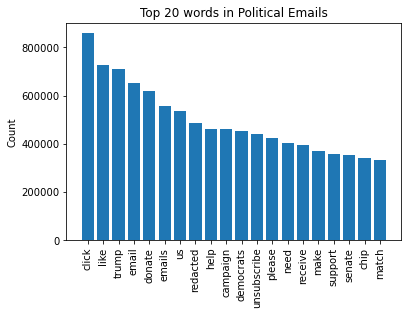

In [139]:
vocabulary_frequency(freq_dist_vocab, 20, 'Top 20 words in Political Emails')

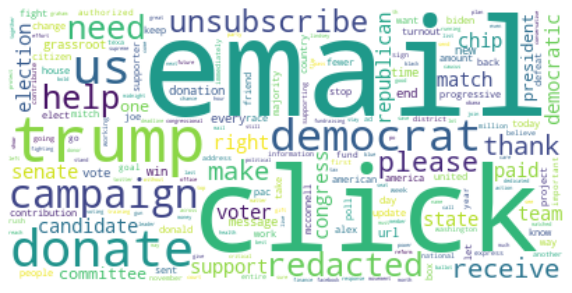

In [142]:
wordcloud = WordCloud(collocations=False, 
                      background_color="white")\
                      .generate(" ".join(vocabulary))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

The top 20 words found within the Political Email Corpus, after traditional stopwords were removed, primarily include words such as 'click', 'like', and 'trump'. Interestingly words such as 'email', 'click', and 'unsubscribe' are heavily featured. This is likely due to the [US's CAN-SPAM Act](https://www.campaignmonitor.com/resources/knowledge-base/is-it-illegal-to-not-have-an-unsubscribe-link/) which require a clear message of how to opt out of emails in the future. Therefore variations of 'click here to unsubscribe' are common within the corpus. 

## Vocabulary of Target

In [219]:
#functions for generating freq_dist and wordclouds 
def get_vocab(target_name, token_column):
    '''
    Input: 
    * target_name = name of target, as string
    * token_column = column name to retrieve tokens 
    Returns: FreqDict for that target's vocabulary
    '''
    vocab = emails[token_column].loc[emails['target']==target_name].explode()
    freq_dist = FreqDist(vocab)
    return freq_dist

def get_wordcloud(freq_dist):
    '''
    Inputs: 
    *freq_dist: FreqDist of words
    *number: number for the max number of words in wordcloud
    '''
    wordcloud = WordCloud(collocations=False, 
                      background_color="white",
                      max_words=100)\
                      .generate_from_frequencies(freq_dist)

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

Vocabulary for Liberal
Top Tokens: ('click', 'like', 'donate', 'email', 'emails', 'trump', 'us', 'campaign', 'democrats', 'redacted', 'unsubscribe', 'please', 'help', 'receive', 'need', 'democratic', 'match', 'chip', 'support', 'make', 'senate', 'congress', 'candidate', 'paid', 'grassroots')
Vocabulary for Conservative
Top Tokens: ('trump', 'president', 'help', 'email', 'senate', 'make', 'us', 'redacted', 'committee', 'america', 'please', 'support', 'need', 'like', 'republican', 'unsubscribe', 'great', 'donate', 'election', 'contribute', 'url', 'paid', 'today', 'campaign', 'receive')
Vocabulary for Center
Top Tokens: ('email', 'redacted', 'us', 'url', 'al', 'gross', 'dr', 'campaign', 'senate', 'help', 'donate', 'people', 'election', 'like', 'wisconsin', 'need', 'vote', 'unsubscribe', 'new', 'today', 'click', 'please', 'support', 'make', 'alex')


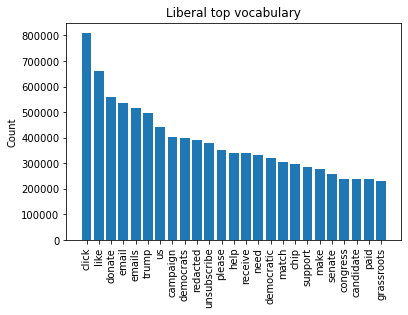

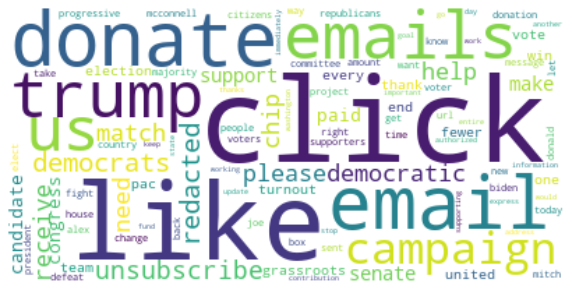

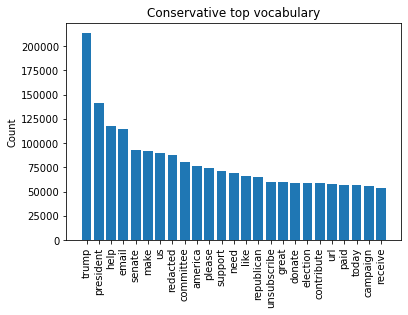

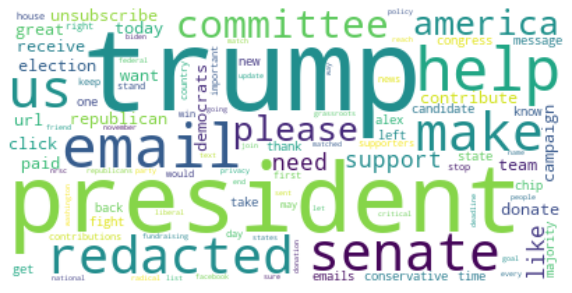

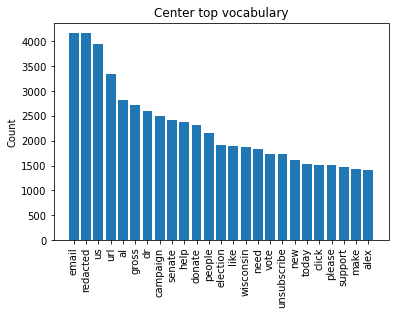

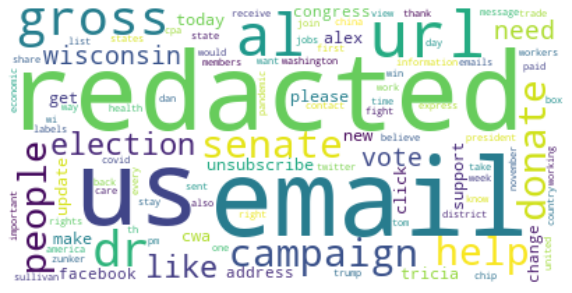

In [154]:
#Vocabulary for each party
for party in emails['target'].unique():
    print(f'Vocabulary for {party}')

    #create party freq_dict of vocab
    party_freq_dist = get_vocab(party, 'tokens') 

    #show top 25 vocab
    vocabulary_frequency(party_freq_dist, 25, party+' top vocabulary')

    get_wordcloud(party_freq_dist)

The three targets have different lists of top 25 words within their respective vocabularies. Some words appear within the top of all three target's vocabulary such as 'email', 'redacted', 'url', and 'alex'. I will pull a sample of emails to see why these words may be appearing frequently.

In [167]:
sample_liberal_email = emails['text'].loc[emails['target']=='Liberal'].sample(1, random_state=40)
print('Sample Liberal Email: \n',sample_liberal_email.values)

sample_conserv_email = emails['text'].loc[emails['target']=='Conservative'].sample(1, random_state=40)
print('\n\nSample Conservative Email: \n', sample_conserv_email.values)

sample_center_email = emails['text'].loc[emails['target']=='Center'].sample(1, random_state=40)
print('\n\nSample Center Email: \n', sample_center_email.values)

Sample Liberal Email: 
 ["Let's Hire a New Lawyer for West Virginia. Dear Alex,\nNow is the time to hire a new lawyer for West Virginia. Our overdose rate doubled under our current Attorney General. Thousands of workers have lost millions in unpaid wages. The State has failed to recover more than pennies on the dollar of our out-of-pocket losses in the addiction crisis. Our Attorney General has the power to stop these losses. But he hasn't.\nWe’re just hours away from reaching our BIG June 30th fundraising deadline. When we have the resources to tell our story, we will win this race and bring back smart and principled legal advocacy for West Virginians.\nChip in $5 →\nChip in $25 →\nChip in $50 →\nChip in $100 →\nChip in $500 →\nYou Decide →\nWe must provide real compensation and support for the thousands of workers who have lost their jobs, wages, and healthcare. We must reverse the massive decline in the number of consumer protection settlements coming out of the Attorney General's o

### Observations: 
* 'alex' is the name of the email recipient which is why it appears in the corpus so much. For this modling process to be transferable, it would be worth removing this word given that the names to email recipents will vary.
    * Addressing an email directly to the reciepient could be considered a marketing approach used more by one target than another. If this is the case, it could be worth feature engineering an element that shows a reciepient was addressed in the email. 
* [[URL REDACTED]] within emails is why 'url' and 'redacted' appear so frequently within the corpus vocabulary. The URLs were redacted by the Princeton Policial Corpus. Deploying a model for real-world application would not included these words. Therefore, it would to remove these words completely. 
    * 'url' and 'redacted' are featured more within some targets than others. Again, this could be a marketing strategy. Feature engineering how many links were present within an email, frequency of the word 'click', could reveal those practices. 
* "Democrat" is irregularly pluralized (e.g. Democrat, Democrats, Democratic Party unlike Republican, Republicans, Republican Party). Simple stemming would capture all versions of "Republican" but not all versions of "Democrat". 
* 'click' appears in a variety of ways within the sample emails: 'click here to unsubcribe', to "CLICK TO HELP GET OUR AD TO THE VOTERS", "Click here to claim your lawn sign". It may be worth investigating how model takes the word 'click' into consideration and removing, or feature engineering with it. 

## Adjustments to Vocabulary
Based on the observations trough EDA I will: 
1. Remove 'alex', 'url', 'redacted', 'email', 'emails', 'unsubscribe', and 'click'
2. Normalize 'democrat/democrats/democratic' by replacing with 'democrat'

In [217]:
all_words_frequency = list(zip(*freq_dist_vocab.most_common(500)))
all_words = all_words_frequency[0]

#search for words that end in '-ic' suffix 
ic_words = [word for word in all_words if word.endswith('ic')]
print(ic_words)

['democratic', 'public', 'pandemic']


In [218]:
remove_words_sparse = ['alex', 'url', 'redacted', 'email', 'emails', 'unsubscribe', 'click']

emails['tokens_sparse'] = emails['tokens'].apply(lambda x: [word.replace('democrats', 'democrat').replace('democratic', 'democrat') for word in x if word not in remove_words_sparse])

## Vocabulary of target variables after adjustments
Explore the frequency of tokens within each target after adjustments from the previous step.

Vocabulary for Liberal
Top Tokens: ('democrat', 'like', 'donate', 'trump', 'us', 'campaign', 'please', 'help', 'receive', 'need', 'match', 'chip', 'support', 'make', 'senate', 'congress', 'candidate', 'paid', 'grassroots', 'fewer', 'united', 'one', 'thank', 'end', 'team')
Vocabulary for Conservative
Top Tokens: ('trump', 'president', 'help', 'senate', 'make', 'us', 'committee', 'democrat', 'america', 'please', 'support', 'need', 'like', 'republican', 'great', 'donate', 'election', 'contribute', 'paid', 'today', 'campaign', 'receive', 'team', 'want', 'congress')
Vocabulary for Center
Top Tokens: ('us', 'al', 'gross', 'dr', 'campaign', 'senate', 'help', 'donate', 'people', 'election', 'like', 'wisconsin', 'need', 'vote', 'new', 'today', 'please', 'support', 'make', 'cwa', 'tricia', 'get', 'update', 'congress', 'change')


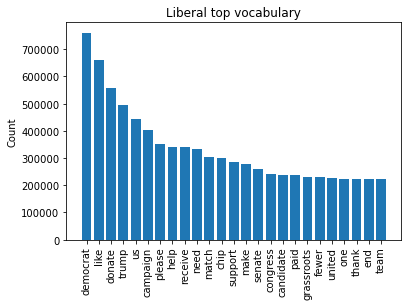

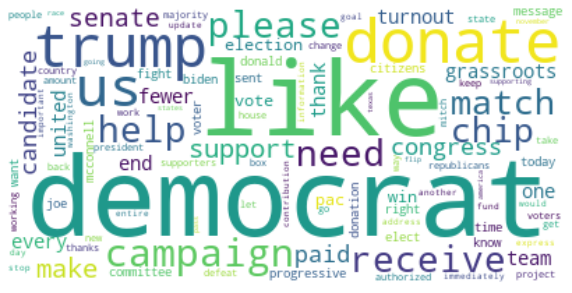

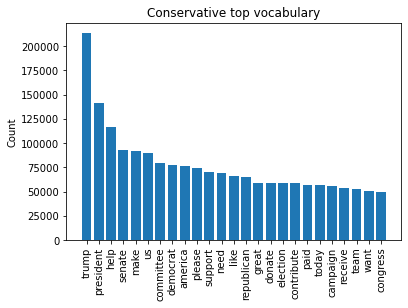

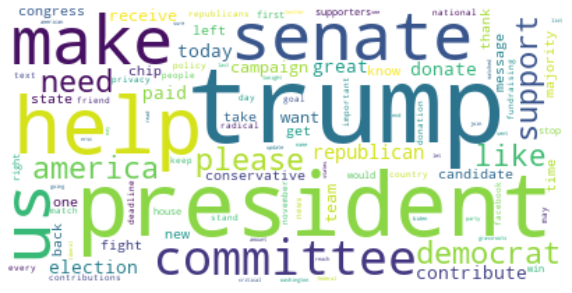

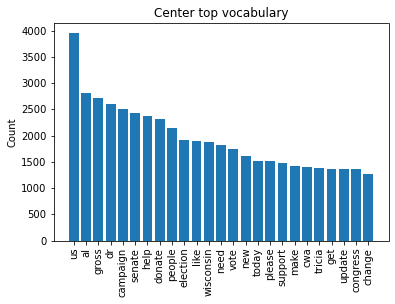

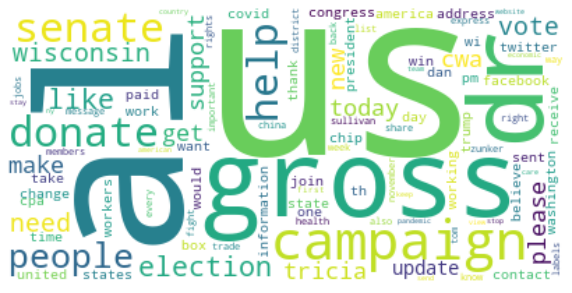

In [220]:
#Vocabulary for each party
for party in emails['target'].unique():
    print(f'Vocabulary for {party}')

    #create party freq_dict of vocab
    party_freq_dist = get_vocab(party, 'tokens_sparse') 

    #show top 25 vocab
    vocabulary_frequency(party_freq_dist, 25, party+' top vocabulary')

    #create wordcloud
    get_wordcloud(party_freq_dist)

The top 25 words for each of the three target variables are different after adjustments. 

# Feature Engineering
As noted above, there are some features of the emails that are not benificial to capture as words but could be useful as a column feature. While I removed the words 'url' and 'redacted' counting the number of times it appears could be insightful if adding links to an email is a marketing strategy. I will capture these types of features in additional columns. 

**Might try: https://flashtext.readthedocs.io/en/latest/ for counter since the other wasn't working**

In [247]:
#join tokens for future vectorizers
emails['sparse_text'] = emails['tokens_sparse'].apply(lambda x: ' '.join(x))

#length of 'sparse_text by characters
emails['sparse_length'] = emails['sparse_text'].apply(lambda x: len(str(x)))

#Find frequency of [[URL REDACTED]] and 'click'
# emails['URL_count'] = emails['text'].apply(lambda x: (str(x).count('[[URL REDACTED]]')))
# emails['click_count'] = emails['text'].apply(lambda x: (str(x).lower().count('click')))

In [266]:
emails['URL_count'].describe()

count    316501.000000
mean          0.794310
std           1.483871
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max         424.000000
Name: URL_count, dtype: float64

In [272]:
emails.loc[emails['URL_count']==424]

,text,target,clean,clean2,tokens,text_length,clean_length,tokens_sparse,target_enc,sparse_text,sparse_length,URL_count,click_count
298690,Fw: Oops! New link. [[URL REDACTED]]\nPaid fo...,Liberal,fw oops new link url redacted paid friends bet...,fw oops new link url redacted paid friends bet...,"[fw, oops, new, link, url, redacted, paid, fri...",11010,7552,"[fw, oops, new, link, paid, friends, beth, lis...",2,fw oops new link paid friends beth liston beth...,2025,424,0


In [273]:
emails.iloc[298690]['text']

'From Liz. I want to tell you who my husband really is.\nView this email in your browser ([[URL REDACTED]])\n[[URL REDACTED]]\n[[URL REDACTED]]\n[[URL REDACTED]]\n[[URL REDACTED]]\n[[URL REDACTED]]\n[[URL REDACTED]]\nDear Residents of Indiana’s 1^st District,\nToday is Election Day. My name is Elizabeth Bergeron and my husband Dion Bergeron is running for the 1^st District Congressional seat that Pete Visclosky has left open. We have a historic opportunity to take this seat back from the Democrats who have reigned supreme in this district for decades. This election will show how every vote matters. I want to tell you why you should vote for Dion Bergeron.\nI met Dion about 11 years ago when we were both Correctional Officers at Indiana State Prison in Michigan City. I’ll never forget that fateful day he was sent by our dispatcher to relieve me at work. I was working in a unit where I had never worked before. I was over my head and getting overwhelmed. Dion came in and became my knight 

# Cleaned Data

In [274]:
emails.head()

,text,target,clean,clean2,tokens,text_length,clean_length,tokens_sparse,target_enc,sparse_text,sparse_length,URL_count,click_count
0,Welcome to the team!. Thanks for joining the t...,Liberal,welcome team thanks joining team name kathleen...,welcome team thanks joining team name kathleen...,"[welcome, team, thanks, joining, team, name, k...",1086,665,"[welcome, team, thanks, joining, team, name, k...",2,welcome team thanks joining team name kathleen...,625,0,0
1,Quickly closing in. We’re just 5 days away fro...,Liberal,quickly closing 5 days away june 30th fec publ...,quickly closing days away june th fec public f...,"[quickly, closing, days, away, june, th, fec, ...",1751,1123,"[quickly, closing, days, away, june, th, fec, ...",2,quickly closing days away june th fec public f...,1083,0,0
2,Welcome to the team!. Thanks for joining the t...,Liberal,welcome team thanks joining team name kathleen...,welcome team thanks joining team name kathleen...,"[welcome, team, thanks, joining, team, name, k...",1865,1212,"[welcome, team, thanks, joining, team, name, k...",2,welcome team thanks joining team name kathleen...,1172,0,0
3,Remembering Dr. King. Today we remember and ho...,Liberal,remembering dr king today remember honor legac...,remembering dr king today remember honor legac...,"[remembering, dr, king, today, remember, honor...",1332,922,"[remembering, dr, king, today, remember, honor...",2,remembering dr king today remember honor legac...,882,0,0
4,We need to close the gap fast. Here’s the trut...,Liberal,need close gap fast truthsummer difficult fund...,need close gap fast truth summer difficult fun...,"[need, close, gap, fast, truth, summer, diffic...",1861,1189,"[need, close, gap, fast, truth, summer, diffic...",2,need close gap fast truth summer difficult fun...,1149,0,0


I will use `sparse_text` and `target` for my initial models.

In [276]:
data = emails[['sparse_text', 'target']].copy()    #condensed dataframe
data.columns = ['text', 'target']                  #easier column names
data.head(1)

,text,target
0,welcome team thanks joining team name kathleen...,Liberal


In [278]:
#save dataframe so I don't have to re-run everything
data.to_csv('data.csv', index=True, columns=data.columns)